<a href="https://colab.research.google.com/github/sanjayjoker7/SkillCraft_Technology_Internship/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/Internship/SkillCraft Technology/datasets/RTA Dataset.csv"
df = pd.read_csv(file_path)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [27]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
missing_values = df.isnull().sum() / len(df) * 100
missing_values[missing_values > 0].sort_values(ascending=False)


,0
Defect_of_vehicle,35.945112
Service_year_of_vehicle,31.893472
Work_of_casuality,25.966223
Fitness_of_casuality,21.394933
Type_of_vehicle,7.713543
Types_of_Junction,7.202014
Driving_experience,6.731082
Educational_level,6.016564
Vehicle_driver_relation,4.701202
Owner_of_vehicle,3.913608


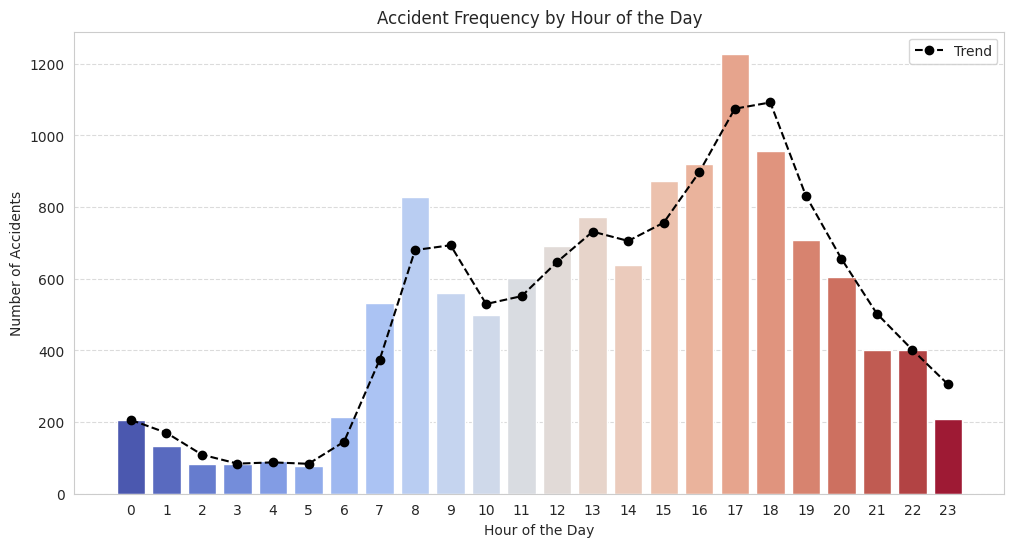

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_cleaned = df.copy()

df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S', errors='coerce').dt.hour

df_cleaned = df_cleaned.dropna(subset=['Hour'])

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned['Hour'], hue=df_cleaned['Hour'], palette='coolwarm', legend=False)
hourly_accidents = df_cleaned['Hour'].value_counts().sort_index()
plt.plot(hourly_accidents.index, hourly_accidents.rolling(window=2, min_periods=1).mean(),
         color='black', marker='o', linestyle='dashed', label='Trend')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Hour of the Day')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


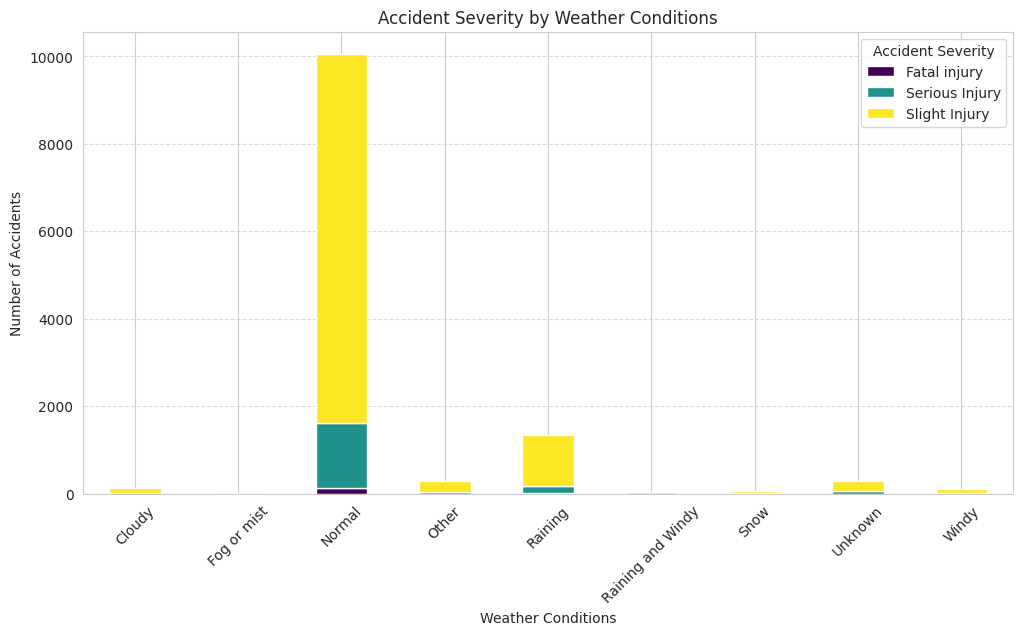

In [31]:
import matplotlib.pyplot as plt

weather_severity = df_cleaned.groupby(['Weather_conditions', 'Accident_severity']).size().unstack()

ax = weather_severity.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Severity by Weather Conditions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels correctly
ax.legend(title="Accident Severity")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


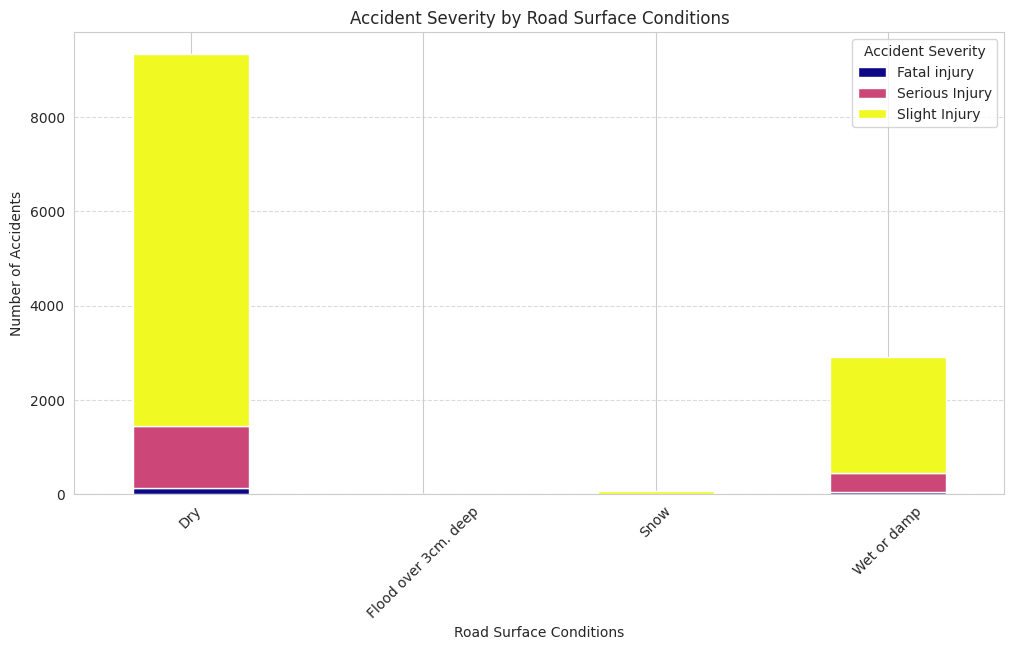

In [32]:
import matplotlib.pyplot as plt

road_severity = df_cleaned.groupby(['Road_surface_conditions', 'Accident_severity']).size().unstack()

ax = road_severity.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,6))

ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Severity by Road Surface Conditions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title="Accident Severity")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


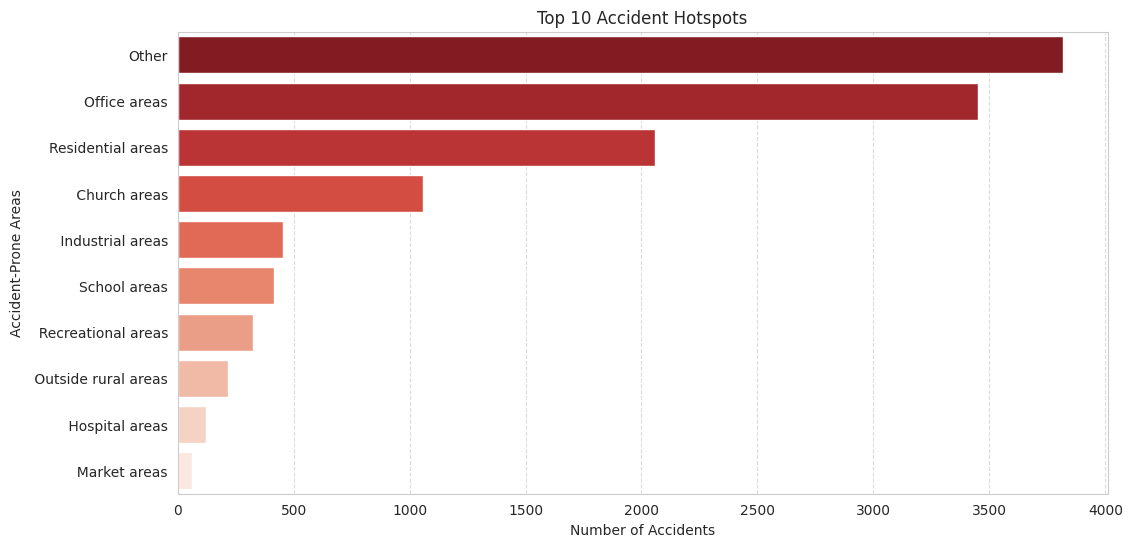

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

area_accidents = df_cleaned['Area_accident_occured'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=area_accidents.values, y=area_accidents.index, hue=area_accidents.index, palette='Reds_r', legend=False)

plt.xlabel('Number of Accidents')
plt.ylabel('Accident-Prone Areas')
plt.title('Top 10 Accident Hotspots')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [34]:
geo_columns = [col for col in df_cleaned.columns if 'lat' in col.lower() or 'long' in col.lower()]
geo_columns


['Vehicle_driver_relation']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

features = ['Weather_conditions', 'Road_surface_conditions', 'Light_conditions',
            'Types_of_Junction', 'Road_allignment', 'Hour']
target = 'Accident_severity'

df_encoded = df_cleaned.copy()
label_encoders = {}
for col in features + [target]:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", report)



Model Accuracy: 0.8304

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.39      0.09      0.14       363
           2       0.85      0.98      0.91      2064

    accuracy                           0.83      2464
   macro avg       0.41      0.35      0.35      2464
weighted avg       0.77      0.83      0.78      2464



In [36]:
date_col = 'Date' if 'Date' in df_cleaned.columns else None

if date_col:
    df_cleaned[date_col] = pd.to_datetime(df_cleaned[date_col], errors='coerce')
    df_time_series = df_cleaned.groupby(df_cleaned[date_col].dt.to_period("M")).size()

    plt.figure(figsize=(12, 6))
    df_time_series.plot(marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.title('Monthly Accident Trends')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()
else:
    time_series_message = "No date column found. Time-series analysis is not possible."

time_series_message if not date_col else None


'No date column found. Time-series analysis is not possible.'

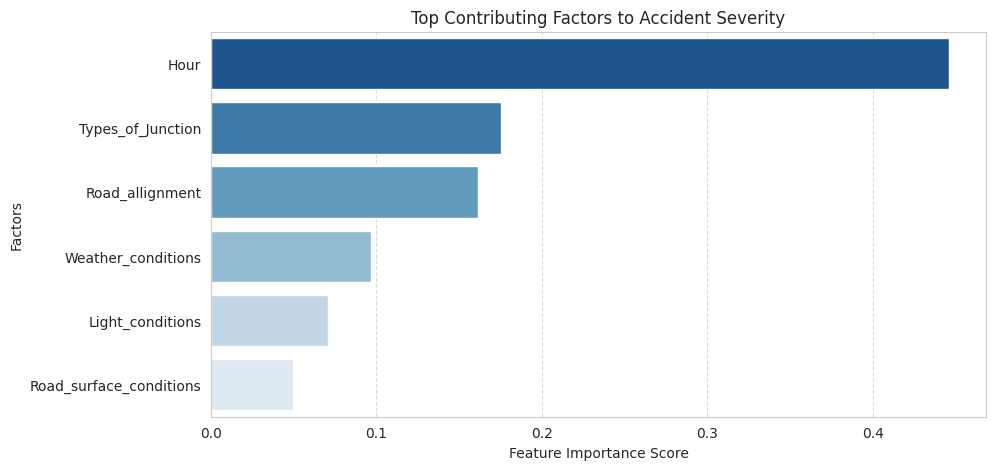

In [37]:
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='Blues_r', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title('Top Contributing Factors to Accident Severity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()